In [1]:
'''

This code is part of the SIPN2 project focused on improving sub-seasonal to seasonal predictions of Arctic Sea Ice. 
If you use this code for a publication or presentation, please cite the reference in the README.md on the
main page (https://github.com/NicWayand/ESIO). 

Questions or comments should be addressed to nicway@uw.edu

Copyright (c) 2018 Nic Wayand

GNU General Public License v3.0


'''

'''
Plot exetent/area from observations and models (past and future)
'''

%matplotlib inline
%load_ext autoreload
%autoreload
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt, mpld3
from collections import OrderedDict
import itertools
import numpy as np
import numpy.ma as ma
import pandas as pd
import struct
import os
import xarray as xr
import glob
import datetime
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import seaborn as sns
np.seterr(divide='ignore', invalid='ignore')


from esio import EsioData as ed
from esio import ice_plot
from esio import metrics

# General plotting settings
sns.set_style('whitegrid')
sns.set_context("talk", font_scale=1.5, rc={"lines.linewidth": 2.5})

/home/disk/sipn/nicway/anaconda3/envs/esio/lib/python3.6/site-packages/ipykernel_launcher.py:24: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/home/disk/sipn/nicway/anaconda3/envs/esio/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/disk/sipn/nicway/anaconda3/envs/esio/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/disk/sipn/nicway/anaconda3/envs/esio/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/disk/sipn/nicway/anaconda3/envs/esio/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  F

In [2]:
# Plotting Info
runType = 'forecast'
variables = ['sic'] #, 'hi'
metric1 = 'extent'

In [3]:
# Initialization times to plot
cd = datetime.datetime.now()
cd = datetime.datetime(cd.year, cd.month, cd.day) # Assumes hours 00, min 00
SD = cd - datetime.timedelta(days=90)
# SD = cd - datetime.timedelta(days=4*365)

# ED = cd + datetime.timedelta(days=365)

In [4]:
# Info about models runs
# icePredicted = {'gfdlsipn':True, 'piomas':True, 'yopp':True, 'bom':False, 'cma':True, 'ecmwf':True, 
#               'hcmr':False, 'isaccnr':False, 'jma':False, 'metreofr':True, 'ukmo':True, 'eccc':False, 
#               'kma':True, 'ncep':True, 'ukmetofficesipn':True, 'ecmwfsipn':True}
# biasCorrected = 

In [5]:
#############################################################
# Load in Data
#############################################################
E = ed.EsioData.load()

In [6]:
# Load obs
import timeit
start_time = timeit.default_timer()
ds_obs = xr.open_mfdataset(E.obs['NSIDC_0081']['sipn_nc']+'/*.nc', concat_dim='time', autoclose=True)#,
print(timeit.default_timer() - start_time)

307.17213837010786


In [7]:
# Load in regional data
# Note minor -0.000004 degree differences in latitude
ds_region = xr.open_dataset(os.path.join(E.grid_dir, 'sio_2016_mask_Update.nc'))

In [8]:
cdate = datetime.datetime.now()


# Plot Raw extents and only models that predict sea ice

Sea of Okhotsk
gfdlsipn
0.3543791673146188  seconds.
piomas
yopp
2.449972365051508  seconds.
ukmetofficesipn
15.961672864854336  seconds.
ecmwfsipn
2.270279754884541  seconds.
ecmwf
0.3203816767781973  seconds.
metreofr
0.1612136997282505  seconds.
ukmo
1.1949063697829843  seconds.
kma
1.1246831906028092  seconds.
ncep
1.2356451167725027  seconds.
usnavysipn
0.2003859900869429  seconds.
usnavyncep
0.22386016696691513  seconds.
rasmesrl
2.2010617526248097  seconds.
noaasipn
0.39838293520733714  seconds.
noaasipn_ext
modcansipns_3
0.6645841249264777  seconds.
modcansipns_4
0.6603569760918617  seconds.
uclsipn
0.01969476556405425  seconds.
MME
Plotting observations


/home/disk/sipn/nicway/anaconda3/envs/esio/lib/python3.6/site-packages/dask/local.py:271: RuntimeWarning: invalid value encountered in greater_equal
  return func(*args2)


Bering
gfdlsipn
0.37336058588698506  seconds.
piomas
yopp
2.6887436131946743  seconds.
ukmetofficesipn
15.407669130712748  seconds.
ecmwfsipn
2.2661099932156503  seconds.
ecmwf
0.34453425789251924  seconds.
metreofr
0.1669245078228414  seconds.
ukmo
1.1227704170159996  seconds.
kma
1.1397191300056875  seconds.
ncep
1.1456344681791961  seconds.
usnavysipn
0.20326900528743863  seconds.
usnavyncep
0.2393316552042961  seconds.
rasmesrl
1.948500138707459  seconds.
noaasipn
0.35512382397428155  seconds.
noaasipn_ext
modcansipns_3
0.6092920890077949  seconds.
modcansipns_4
0.57005066704005  seconds.
uclsipn
0.018697282765060663  seconds.
MME
Plotting observations


/home/disk/sipn/nicway/anaconda3/envs/esio/lib/python3.6/site-packages/dask/local.py:271: RuntimeWarning: invalid value encountered in greater_equal
  return func(*args2)


Hudson Bay
gfdlsipn
0.36621192935854197  seconds.
piomas
yopp
2.3172812340781093  seconds.
ukmetofficesipn
16.53391131106764  seconds.
ecmwfsipn
2.1418807026930153  seconds.
ecmwf
0.28576497780159116  seconds.
metreofr
0.15080791106447577  seconds.
ukmo
1.2914726119488478  seconds.
kma
1.0839462047442794  seconds.
ncep
1.0444238069467247  seconds.
usnavysipn
0.1964792190119624  seconds.
usnavyncep
0.27373294066637754  seconds.
rasmesrl
1.8788888729177415  seconds.
noaasipn
0.37428274704143405  seconds.
noaasipn_ext
modcansipns_3
0.6393439718522131  seconds.
modcansipns_4
0.6455571809783578  seconds.
uclsipn
0.02363802818581462  seconds.
MME
Plotting observations


/home/disk/sipn/nicway/anaconda3/envs/esio/lib/python3.6/site-packages/dask/local.py:271: RuntimeWarning: invalid value encountered in greater_equal
  return func(*args2)


St John
gfdlsipn
0.3130605109035969  seconds.
piomas
yopp
1.8052951358258724  seconds.
ukmetofficesipn
15.140643802005798  seconds.
ecmwfsipn
1.6416112361475825  seconds.
ecmwf
0.2665828885510564  seconds.
metreofr
0.11470978707075119  seconds.
ukmo
1.0040774890221655  seconds.
kma
1.032706482335925  seconds.
ncep
1.0985537800006568  seconds.
usnavysipn
0.15118078282102942  seconds.
usnavyncep
0.14463364193215966  seconds.
rasmesrl
1.9457134017720819  seconds.
noaasipn
0.40197248198091984  seconds.
noaasipn_ext
modcansipns_3
0.41067797876894474  seconds.
modcansipns_4
0.32930359430611134  seconds.
uclsipn
0.018091809004545212  seconds.
MME
Plotting observations


/home/disk/sipn/nicway/anaconda3/envs/esio/lib/python3.6/site-packages/dask/local.py:271: RuntimeWarning: invalid value encountered in greater_equal
  return func(*args2)


Baffin Bay
gfdlsipn
0.35279805306345224  seconds.
piomas
yopp
2.394214176107198  seconds.
ukmetofficesipn
16.121022294741124  seconds.
ecmwfsipn
2.089424630161375  seconds.
ecmwf
0.3174550998955965  seconds.
metreofr
0.16611592657864094  seconds.
ukmo
1.129481934942305  seconds.
kma
1.0626148087903857  seconds.
ncep
1.1029694247990847  seconds.
usnavysipn
0.16225296491757035  seconds.
usnavyncep
0.2341734296642244  seconds.
rasmesrl
1.9588784370571375  seconds.
noaasipn
0.38176043098792434  seconds.
noaasipn_ext
modcansipns_3
0.5785267101600766  seconds.
modcansipns_4
0.6034214766696095  seconds.
uclsipn
0.019193593878298998  seconds.
MME
Plotting observations


/home/disk/sipn/nicway/anaconda3/envs/esio/lib/python3.6/site-packages/dask/local.py:271: RuntimeWarning: invalid value encountered in greater_equal
  return func(*args2)


East Greenland Sea
gfdlsipn
0.3758294191211462  seconds.
piomas
yopp
2.398404201027006  seconds.
ukmetofficesipn
16.96722353901714  seconds.
ecmwfsipn
2.151776918210089  seconds.
ecmwf
0.292183639947325  seconds.
metreofr
0.13050658395513892  seconds.
ukmo
1.0458786860108376  seconds.
kma
1.0233131530694664  seconds.
ncep
1.0049104108475149  seconds.
usnavysipn
0.16191707272082567  seconds.
usnavyncep
0.2271433724090457  seconds.
rasmesrl
1.8983221896924078  seconds.
noaasipn
0.3675888432189822  seconds.
noaasipn_ext
modcansipns_3
0.5472183083184063  seconds.
modcansipns_4
0.567527870181948  seconds.
uclsipn
0.019879916682839394  seconds.
MME
Plotting observations


/home/disk/sipn/nicway/anaconda3/envs/esio/lib/python3.6/site-packages/dask/local.py:271: RuntimeWarning: invalid value encountered in greater_equal
  return func(*args2)


Barents Sea
gfdlsipn
0.36311642406508327  seconds.
piomas
yopp
2.948719594627619  seconds.
ukmetofficesipn
16.825090658850968  seconds.
ecmwfsipn
1.9733652328141034  seconds.
ecmwf
0.30142740812152624  seconds.
metreofr
0.1386936530470848  seconds.
ukmo
0.9213610771112144  seconds.
kma
1.1207555760629475  seconds.
ncep
1.1016231421381235  seconds.
usnavysipn
0.16869748895987868  seconds.
usnavyncep
0.2321603912860155  seconds.
rasmesrl
1.8732425179332495  seconds.
noaasipn
0.3701752331107855  seconds.
noaasipn_ext
modcansipns_3
0.5597984469495714  seconds.
modcansipns_4
0.5653704665601254  seconds.
uclsipn
0.019762350246310234  seconds.
MME
Plotting observations


/home/disk/sipn/nicway/anaconda3/envs/esio/lib/python3.6/site-packages/dask/local.py:271: RuntimeWarning: invalid value encountered in greater_equal
  return func(*args2)


Kara Sea
gfdlsipn
0.3135344320908189  seconds.
piomas
yopp
2.3005074579268694  seconds.
ukmetofficesipn
17.149006959982216  seconds.
ecmwfsipn
2.176818144042045  seconds.
ecmwf
1.04622896714136  seconds.
metreofr
0.16251558624207973  seconds.
ukmo
1.1329273669980466  seconds.
kma
1.0718090641312301  seconds.
ncep
1.1795734567567706  seconds.
usnavysipn
0.17207160172984004  seconds.
usnavyncep
0.22278647776693106  seconds.
rasmesrl
2.0259499363601208  seconds.
noaasipn
0.38526161620393395  seconds.
noaasipn_ext
modcansipns_3
0.5347926178947091  seconds.
modcansipns_4
0.5629732171073556  seconds.
uclsipn
0.019002939108759165  seconds.
MME
Plotting observations


/home/disk/sipn/nicway/anaconda3/envs/esio/lib/python3.6/site-packages/dask/local.py:271: RuntimeWarning: invalid value encountered in greater_equal
  return func(*args2)


Laptev Sea
gfdlsipn
0.37647711811587214  seconds.
piomas
yopp
2.452112272847444  seconds.
ukmetofficesipn
17.411608572117984  seconds.
ecmwfsipn
2.221731796860695  seconds.
ecmwf
0.28325339313596487  seconds.
metreofr
0.1613192860968411  seconds.
ukmo
1.1080770948901772  seconds.
kma
1.0718865990638733  seconds.
ncep
1.0498291039839387  seconds.
usnavysipn
0.19379794504493475  seconds.
usnavyncep
0.2408806663006544  seconds.
rasmesrl
1.8982726917602122  seconds.
noaasipn
0.39575805701315403  seconds.
noaasipn_ext
modcansipns_3
0.5720776752568781  seconds.
modcansipns_4
0.5863891402259469  seconds.
uclsipn
0.01985523197799921  seconds.
MME
Plotting observations


/home/disk/sipn/nicway/anaconda3/envs/esio/lib/python3.6/site-packages/dask/local.py:271: RuntimeWarning: invalid value encountered in greater_equal
  return func(*args2)


East Siberian Sea
gfdlsipn
0.31464583799242973  seconds.
piomas
yopp
2.330642445012927  seconds.
ukmetofficesipn
16.599009257741272  seconds.
ecmwfsipn
2.156278416980058  seconds.
ecmwf
0.29265057388693094  seconds.
metreofr
0.1564066899009049  seconds.
ukmo
1.0791876851581037  seconds.
kma
1.0563290868885815  seconds.
ncep
1.005483936984092  seconds.
usnavysipn
0.17668205592781305  seconds.
usnavyncep
0.23213623510673642  seconds.
rasmesrl
2.039826321415603  seconds.
noaasipn
0.3789545348845422  seconds.
noaasipn_ext
modcansipns_3
0.5662014507688582  seconds.
modcansipns_4
0.5746553149074316  seconds.
uclsipn
0.019624619279056787  seconds.
MME
Plotting observations


/home/disk/sipn/nicway/anaconda3/envs/esio/lib/python3.6/site-packages/dask/local.py:271: RuntimeWarning: invalid value encountered in greater_equal
  return func(*args2)


Chukchi Sea
gfdlsipn
0.3664178070612252  seconds.
piomas
yopp
2.334865755867213  seconds.
ukmetofficesipn
16.507854423951358  seconds.
ecmwfsipn
2.1584752588532865  seconds.
ecmwf
0.2867388720624149  seconds.
metreofr
0.15157869458198547  seconds.
ukmo
1.0339356833137572  seconds.
kma
1.0240154438652098  seconds.
ncep
1.0520074656233191  seconds.
usnavysipn
0.18230479024350643  seconds.
usnavyncep
0.24657665891572833  seconds.
rasmesrl
1.929993416648358  seconds.
noaasipn
0.3599032089114189  seconds.
noaasipn_ext
modcansipns_3
0.531700411811471  seconds.
modcansipns_4
0.5812051850371063  seconds.
uclsipn
0.01862958399578929  seconds.
MME
Plotting observations


/home/disk/sipn/nicway/anaconda3/envs/esio/lib/python3.6/site-packages/dask/local.py:271: RuntimeWarning: invalid value encountered in greater_equal
  return func(*args2)


Beaufort Sea
gfdlsipn
0.3726272201165557  seconds.
piomas
yopp
2.3626983710564673  seconds.
ukmetofficesipn
17.05299660889432  seconds.
ecmwfsipn
2.1234816783107817  seconds.
ecmwf
0.30901395389810205  seconds.
metreofr
0.1623079776763916  seconds.
ukmo
1.0503509119153023  seconds.
kma
1.058453009929508  seconds.
ncep
1.0342743271030486  seconds.
usnavysipn
0.1735664140433073  seconds.
usnavyncep
0.19361680187284946  seconds.
rasmesrl
1.9777488876134157  seconds.
noaasipn
0.3545329999178648  seconds.
noaasipn_ext
modcansipns_3
0.5857379259541631  seconds.
modcansipns_4
0.5388637860305607  seconds.
uclsipn
0.018629929050803185  seconds.
MME
Plotting observations


/home/disk/sipn/nicway/anaconda3/envs/esio/lib/python3.6/site-packages/dask/local.py:271: RuntimeWarning: invalid value encountered in greater_equal
  return func(*args2)


Canadian Islands
gfdlsipn
0.3634770126082003  seconds.
piomas
yopp
2.3800252438522875  seconds.
ukmetofficesipn
16.698170021176338  seconds.
ecmwfsipn
2.0847064731642604  seconds.
ecmwf
0.2672643200494349  seconds.
metreofr
0.13689506892114878  seconds.
ukmo
0.9996240232139826  seconds.
kma
0.947186253964901  seconds.
ncep
1.0605299780145288  seconds.
usnavysipn
0.16570167103782296  seconds.
usnavyncep
0.21555936988443136  seconds.
rasmesrl
1.8863854701630771  seconds.
noaasipn
0.37995929503813386  seconds.
noaasipn_ext
modcansipns_3
0.5228321510367095  seconds.
modcansipns_4
0.5751649430021644  seconds.
uclsipn
0.020014101173728704  seconds.
MME
Plotting observations


/home/disk/sipn/nicway/anaconda3/envs/esio/lib/python3.6/site-packages/dask/local.py:271: RuntimeWarning: invalid value encountered in greater_equal
  return func(*args2)


Central Arctic
gfdlsipn
0.3402140191756189  seconds.
piomas
yopp
2.2294581183232367  seconds.
ukmetofficesipn
16.75820387294516  seconds.
ecmwfsipn
2.1010587490163743  seconds.
ecmwf
0.2662491137161851  seconds.
metreofr
0.1512784669175744  seconds.
ukmo
1.0408702213317156  seconds.
kma
1.0977947148494422  seconds.
ncep
1.109339206945151  seconds.
usnavysipn
0.17286961991339922  seconds.
usnavyncep
0.23212079796940088  seconds.
rasmesrl
1.9636344499886036  seconds.
noaasipn
0.3619146109558642  seconds.
noaasipn_ext
modcansipns_3
0.5669724228791893  seconds.
modcansipns_4
0.5574083607643843  seconds.
uclsipn
0.019519557245075703  seconds.
MME
Plotting observations


/home/disk/sipn/nicway/anaconda3/envs/esio/lib/python3.6/site-packages/dask/local.py:271: RuntimeWarning: invalid value encountered in greater_equal
  return func(*args2)


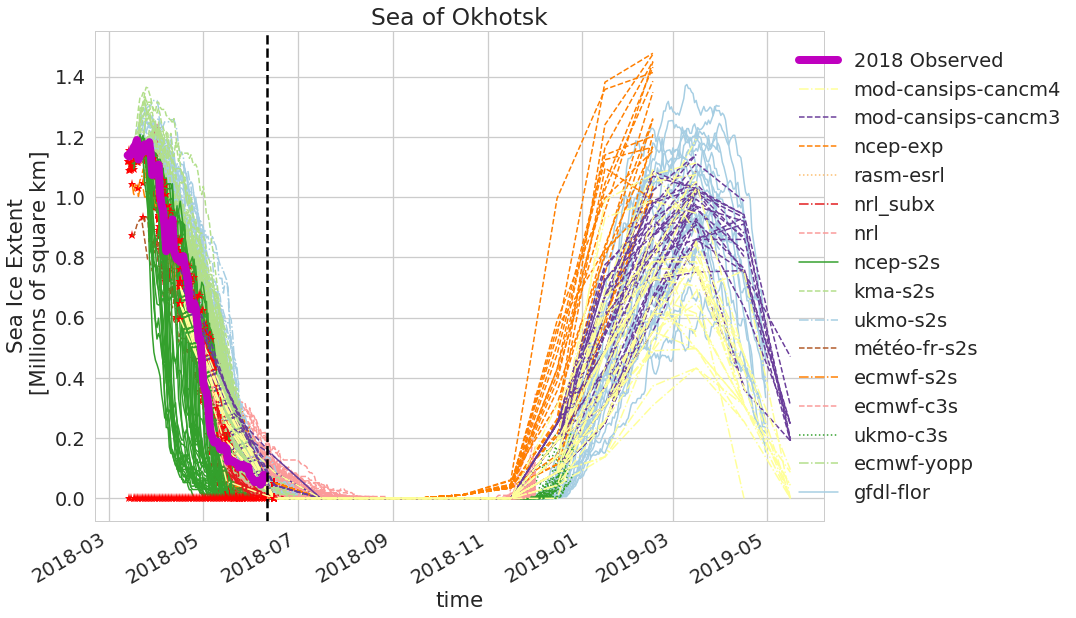

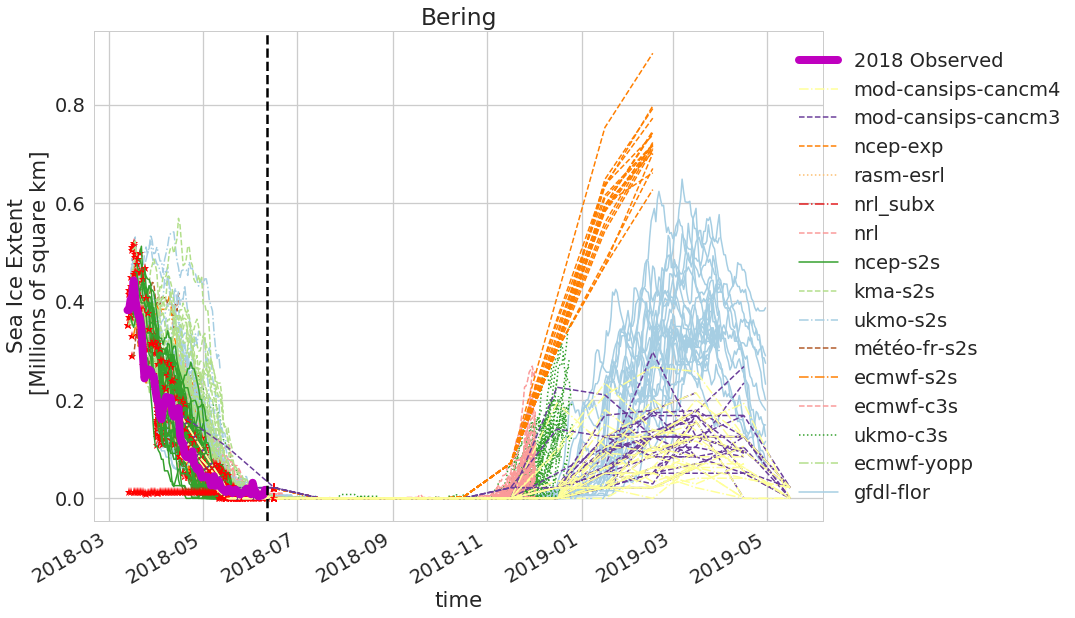

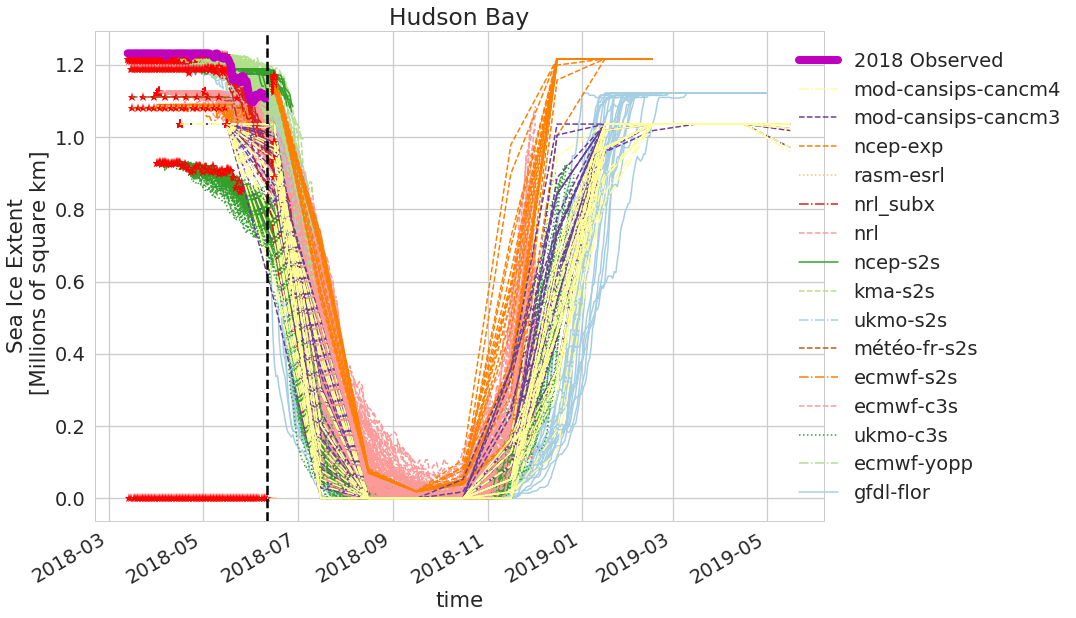

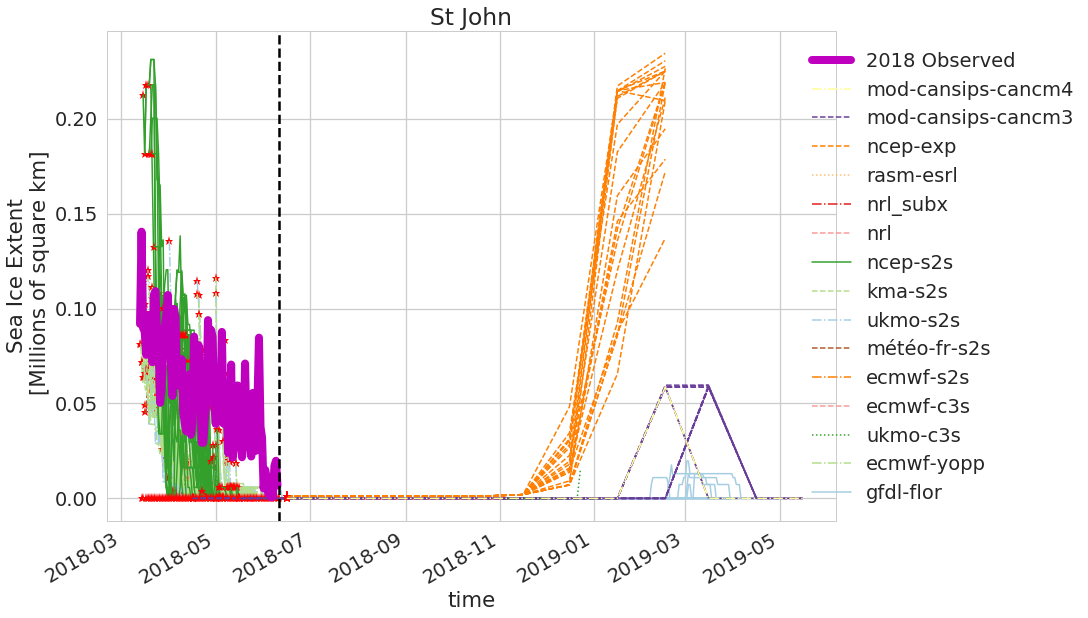

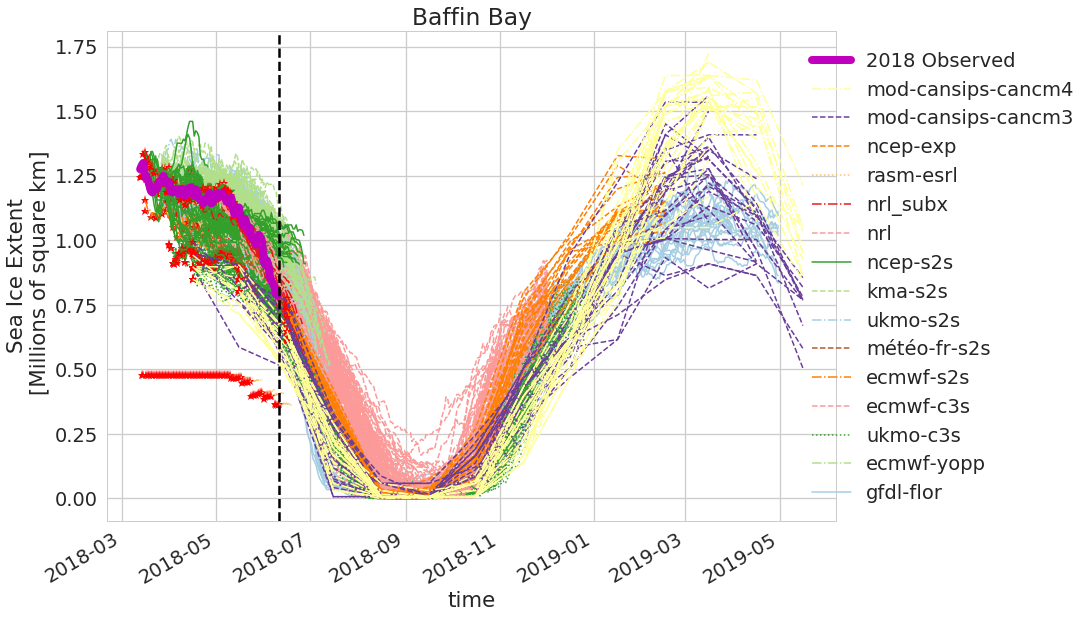

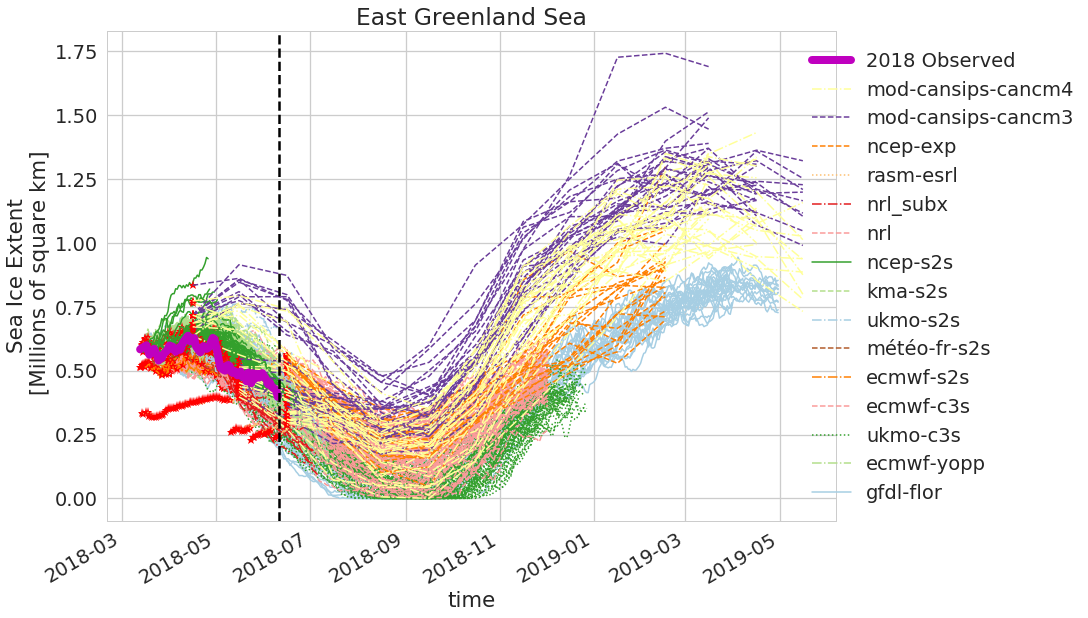

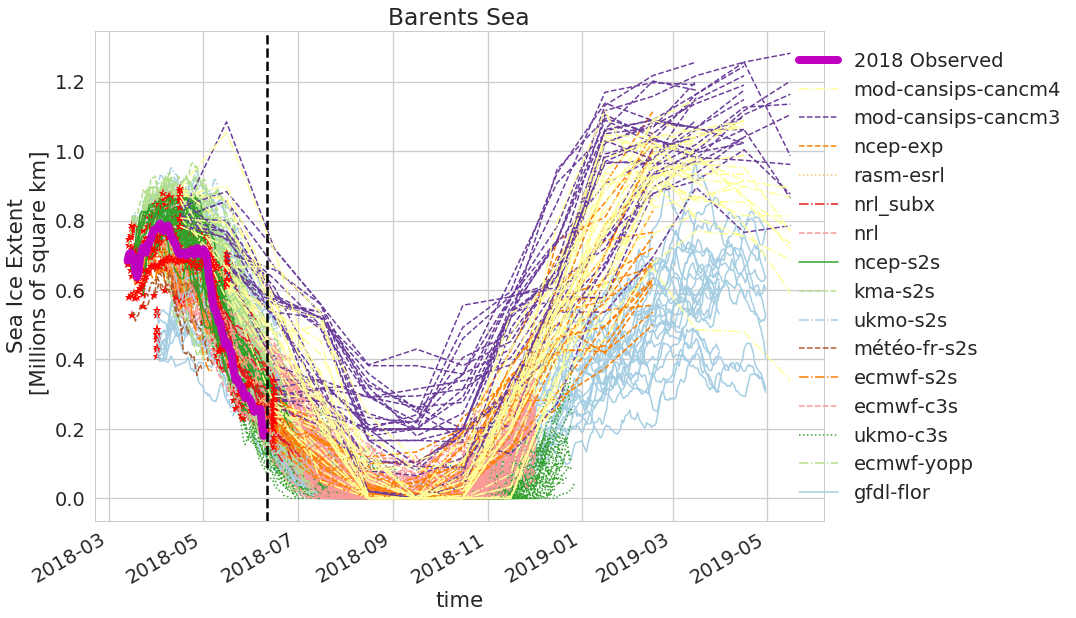

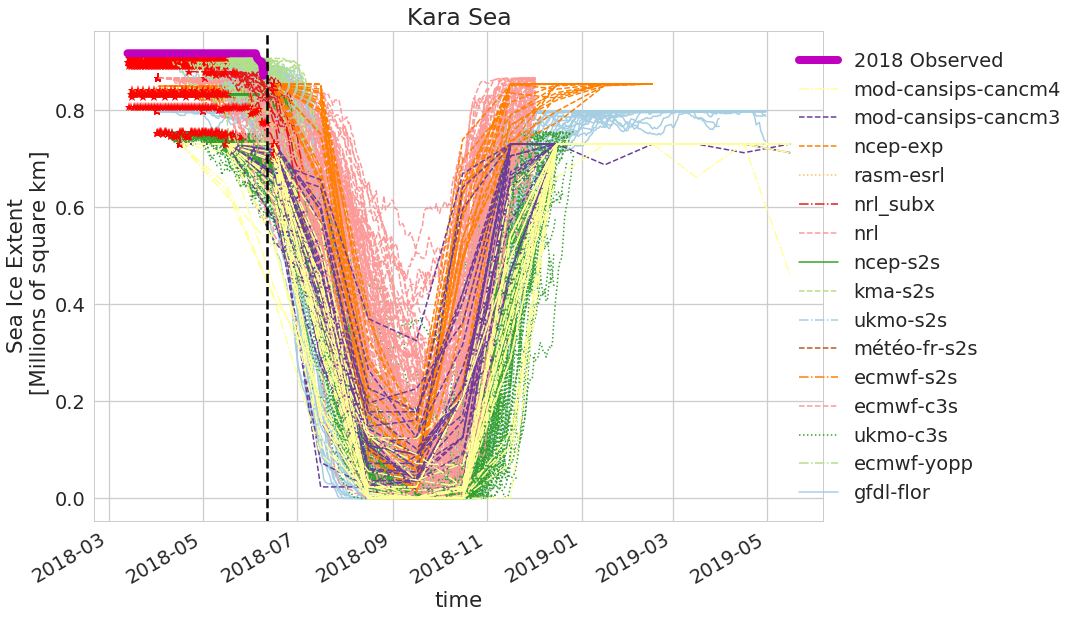

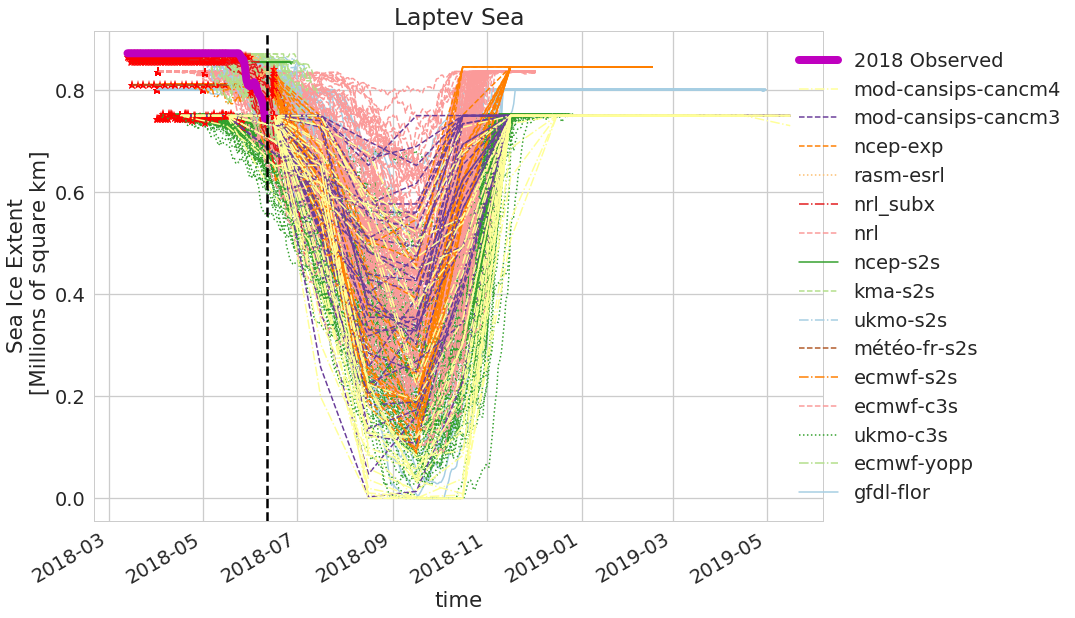

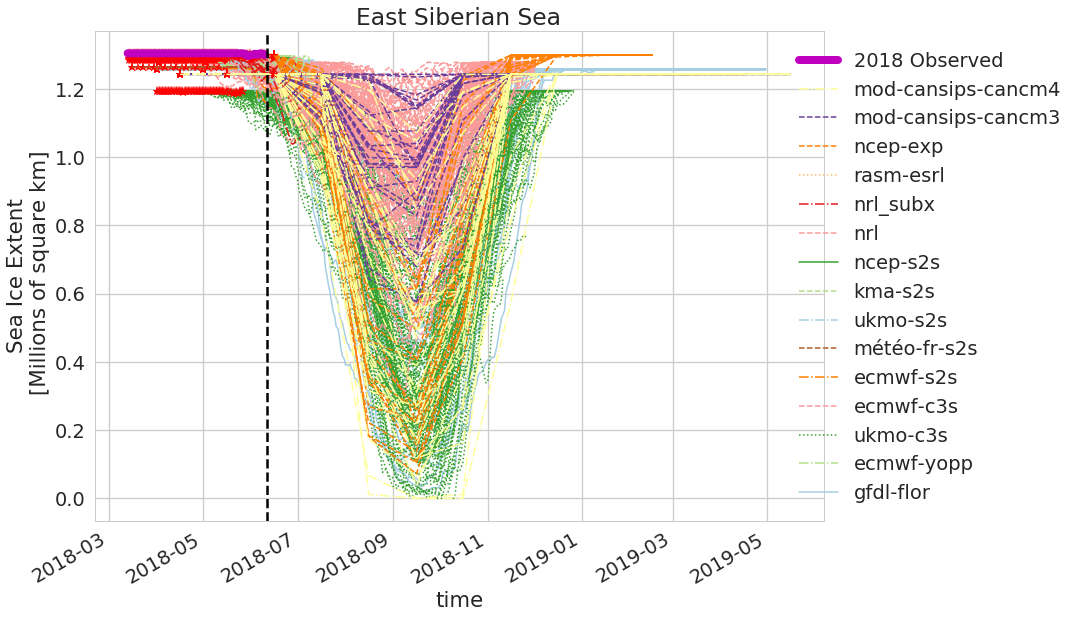

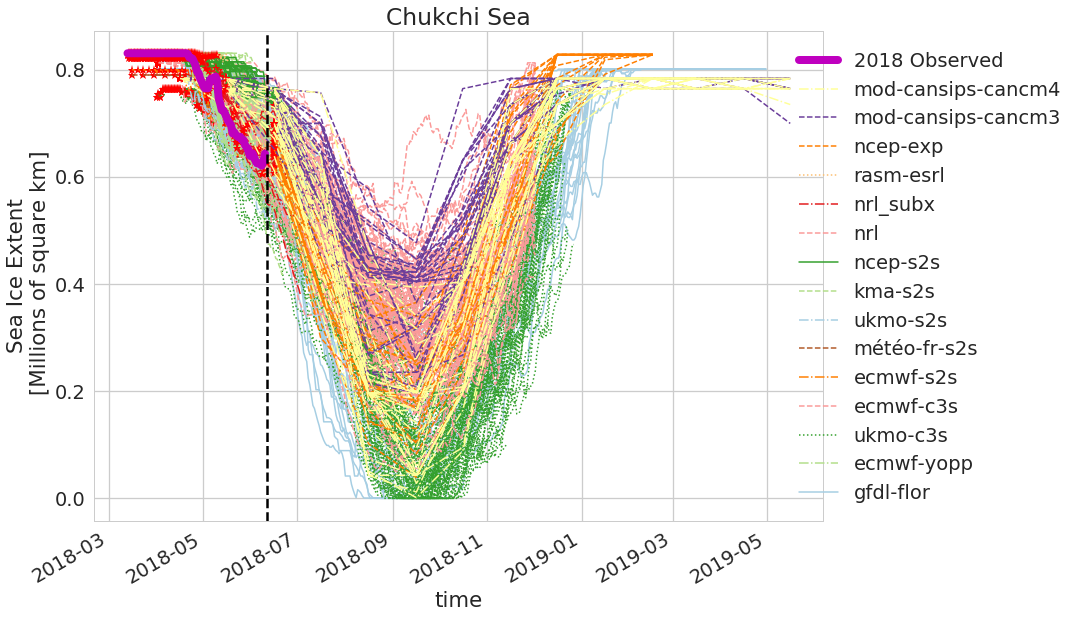

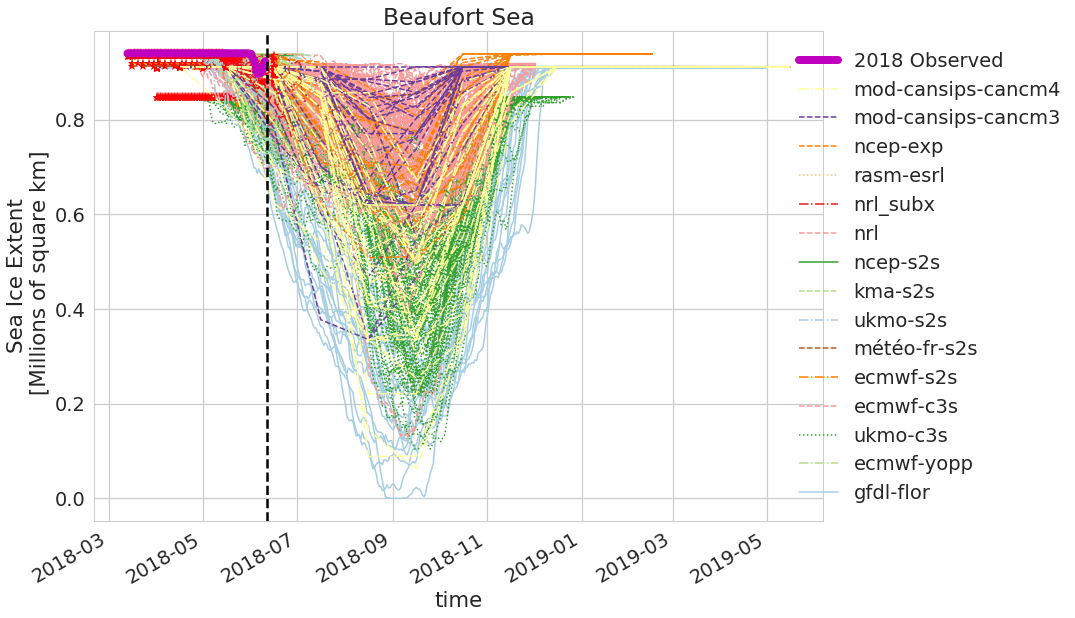

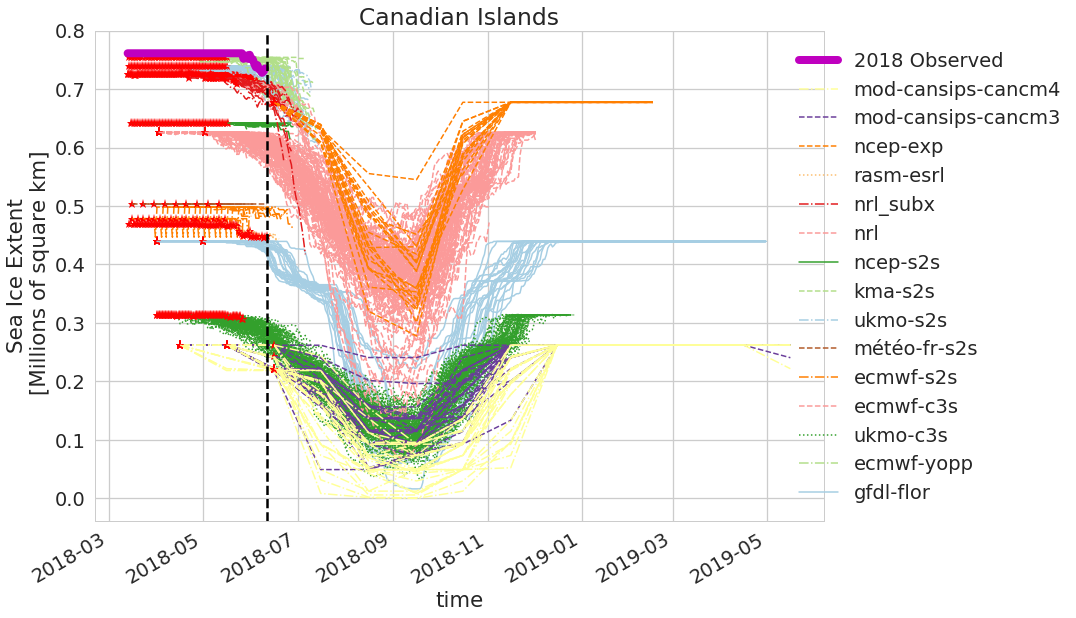

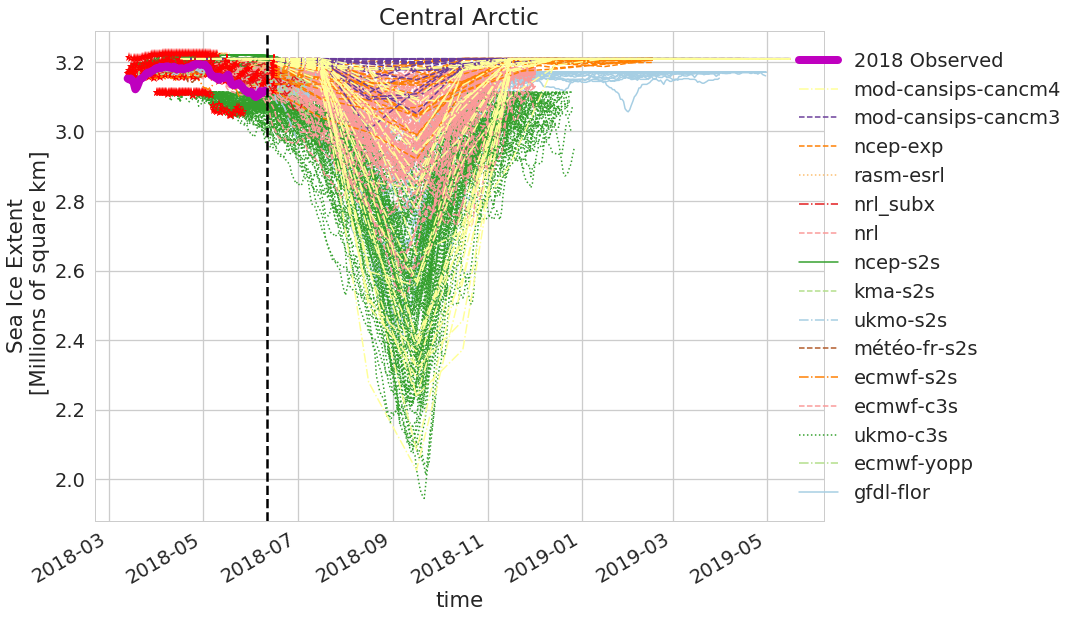

In [9]:
# cmap_c = itertools.cycle(sns.color_palette("Paired", len(E.model.keys()) ))
# linecycler = itertools.cycle(["-","--","-.",":","--"])
for cvar in variables:
    
    fig_dir = os.path.join(E.fig_dir, 'model', 'all_model', cvar, "regional_timeseries")
    if not os.path.exists(fig_dir):
        os.makedirs(fig_dir)

    # For each region
    for cR in ds_region.ocean_regions.values:    
        cR_name = ds_region.region_names.sel(nregions=cR).item(0)
        print(cR_name)

        # New Plot
        f = plt.figure(figsize=(15,10))
        ax1 = plt.subplot(1, 1, 1) # Observations

        for (i, cmod) in enumerate(E.model.keys()):
#         for (i, cmod) in enumerate(['usnavyncep','usnavysipn']):

            if not E.icePredicted[cmod]:
                continue
            print(cmod)
            # Load in Model
            model_forecast = os.path.join(E.model[cmod][runType]['sipn_nc_agg'], '*.nc')

            # Check we have files 
            files = glob.glob(model_forecast)
            if not files:
                #print("Skipping model", cmod, "no forecast files found.")
                continue # Skip this model
            ds_model = xr.open_mfdataset(model_forecast, concat_dim='init_time',
                                         autoclose=True)

            # Get Extent
            ds_model = ds_model.Extent

            # Select init of interest
            ds_model = ds_model.where(ds_model.init_time>=np.datetime64(SD), drop=True)
            
#             # Take mean of ensemble
#             ds_model = ds_model.mean(dim='ensemble')

            # Select region
            ds_model = ds_model.sel(nregions=cR)

            # Get model plotting specs
            cc = E.model_color[cmod]
            cl = E.model_linestyle[cmod]

            # Plot Model
            if i == 1: # Control only one initiailzation label in legend
                no_init_label = False
            else:
                no_init_label = True
            import timeit
            start_time = timeit.default_timer()
            
            ice_plot.plot_reforecast(ds=ds_model, axin=ax1, 
                                 labelin=E.model[cmod]['model_label'],
                                 color=cc, marker=None,
                                 linestyle=cl,
                                 no_init_label=no_init_label)
            print( (timeit.default_timer() - start_time), ' seconds.' )

            # Memeory clean up
            ds_model = None     
            
                

        # Plot observations
        print('Plotting observations')
        ds_obs_reg = ds_obs.sic.where(ds_obs.time>=np.datetime64(SD), drop=True)
        ds_obs_reg = ds_obs_reg.where(ds_region.mask==cR)
        ds_obs_reg = ((ds_obs_reg >= 0.15).astype('int') * ds_region.area).sum(dim='x').sum(dim='y')/(10**6)
        ds_obs_reg.plot(ax=ax1, label=str(cdate.year)+' Observed', color='m', linewidth=8)
        ax1.set_ylabel('Sea Ice Extent\n [Millions of square km]')
        cxlims = ax1.get_xlim()
        

    #     # 1980-2010 Historical Interquartile Range
    #     plt.fill_between(ds_per_mean.time.values, ds_per_mean + ds_per_std, 
    #                  ds_per_mean - ds_per_std, alpha=0.35, label='1980-2010\nInterquartile Range', color='m')
        ax1.set_xlim(cxlims) # fix x limits
        cylims = ax1.get_ylim()

        # Plot current date line
        ax1.plot([cd, cd], [cylims[0], cylims[1]], color='k', linestyle='--')
        
        ax1.set_title(cR_name)

        # Add legend (static)
        handles, labels = ax1.get_legend_handles_labels()
        ax1.legend(handles[::-1], labels[::-1], loc='lower right',bbox_to_anchor=(1.35, 0))

        f.autofmt_xdate()
        ax1.set_ylim(cylims)
        plt.subplots_adjust(right=.8)

        # Save to file
        base_name_out = 'Region_'+cR_name.replace(" ", "_")+'_'+metric1+'_'+runType+'_raw_predicted'
        f_out = os.path.join(fig_dir, base_name_out+'.png')
        f.savefig(f_out,bbox_inches='tight',dpi=200)
        mpld3.save_html(f, os.path.join(fig_dir, base_name_out+'.html'))

        # Mem clean up
        ds_model = None
        ds_obs_reg = None
        f = None